In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

In [ ]:
import pandas as pd

cols= ['Tweet_id', 'Entity', 'Classes', 'Tweet_content']

# Load the datasets
train_file_path = '/content/drive/MyDrive/Prodigy_Internship/twitter_training.csv'
val_file_path = '/content/drive/MyDrive/Prodigy_Internship/twitter_validation.csv'

df_train = pd.read_csv(train_file_path, names=cols)
df_val = pd.read_csv(val_file_path, names=cols)

# Combine the datasets for a comprehensive analysis
df = pd.concat([df_train, df_val], ignore_index=True)

# Display the first few rows of the dataframe
df.head()


,Tweet_id,Entity,Classes,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Rename columns for easier access
df.columns = ['Tweet_id', 'Entity', 'Classes', 'Tweet_content']

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(subset=['Tweet_content'], inplace=True)

# Function for text preprocessing
def preprocess_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary

    # Lowercasing
    text = text.lower()
    # Removing special characters and numbers
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Joining tokens back to string
    text = ' '.join(tokens)
    return text

# Apply text preprocessing
df['cleaned_text'] = df['Tweet_content'].apply(preprocess_text)

# Display the first few rows of the cleaned dataframe
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tweet_id           0
Entity             0
Classes            0
Tweet_content    686
dtype: int64
   Tweet_id       Entity   Classes  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet_content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    cleaned_text  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  


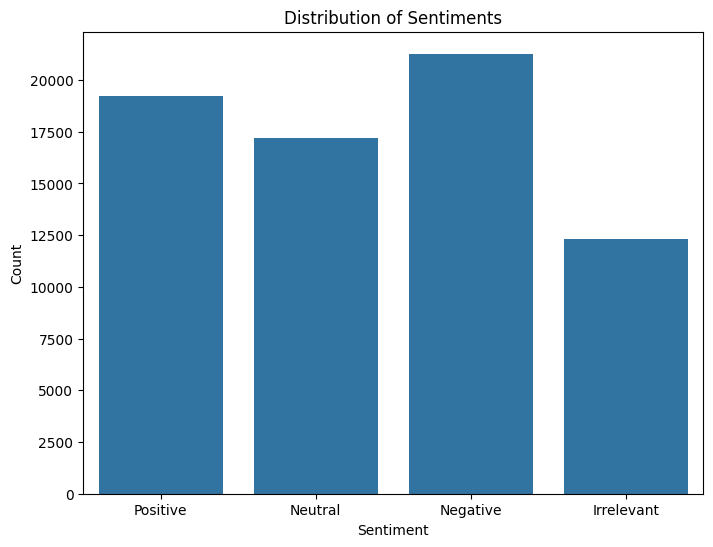

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assuming 'Classes' column contains sentiment labels, rename it to 'target'
df.rename(columns={'Classes': 'target'}, inplace=True)

# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



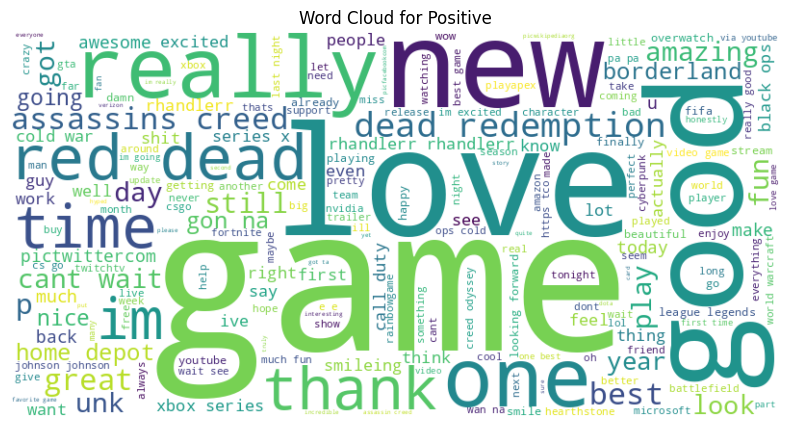

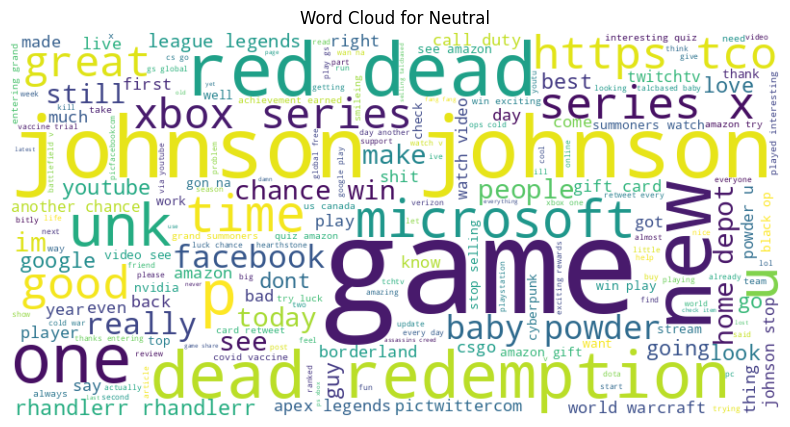

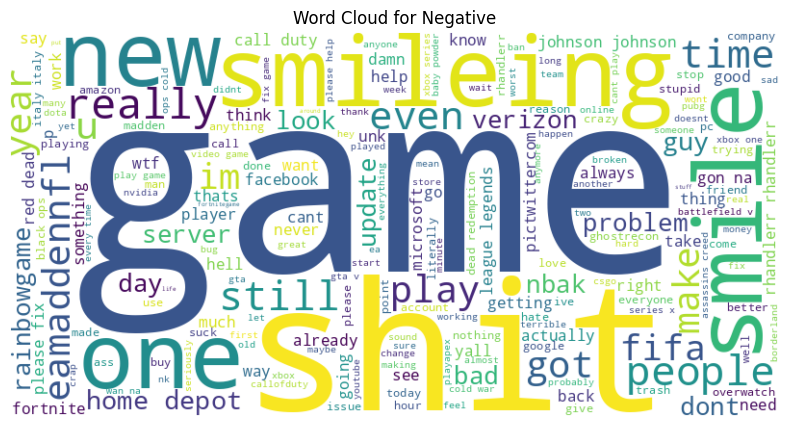

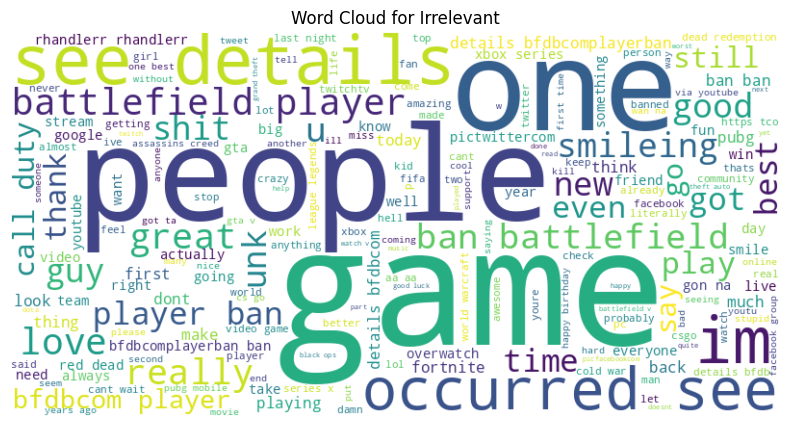

In [ ]:
# Generate word clouds for each sentiment
sentiments = df['target'].unique()

for sentiment in sentiments:
    text = ' '.join(df[df['target'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment}')
    plt.axis('off')
    plt.show()

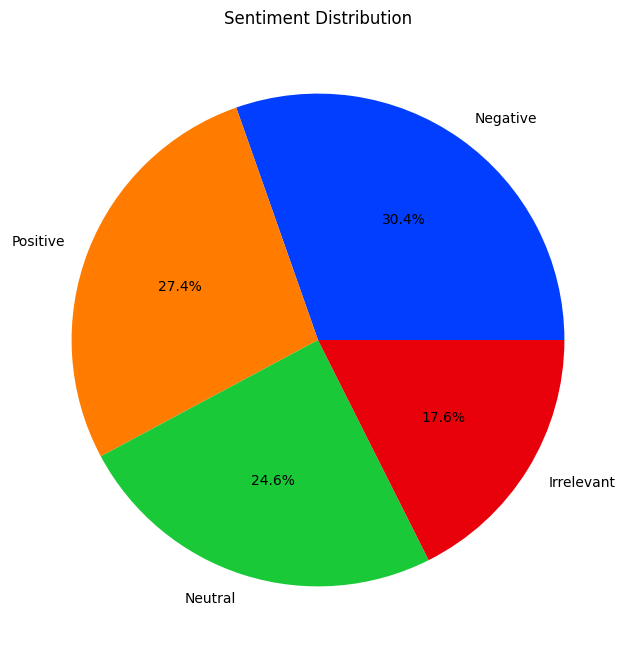

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for sentiments with bright colors
sentiment_counts = df['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("bright"))
plt.title('Sentiment Distribution')
plt.show()


<ipython-input-27-6690feccf801>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='bright')


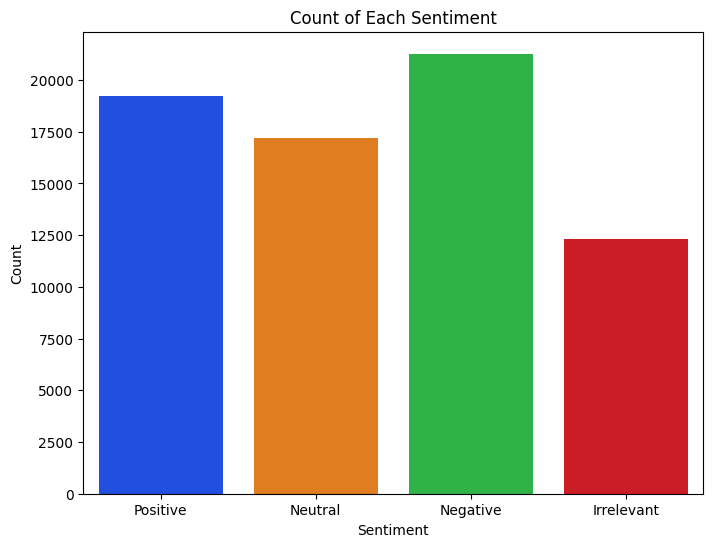

In [ ]:
# Bar plot for sentiment counts
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='bright')
plt.title('Count of Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Tweet_id
9506     7
12664    7
8349     7
1579     7
11311    7
Name: count, dtype: int64


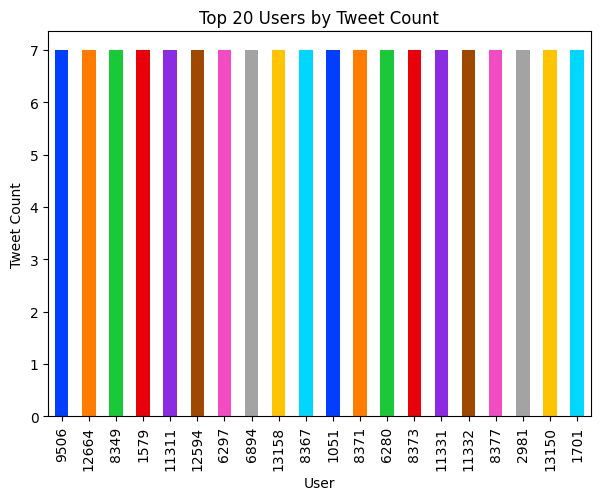

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of top users to display
top_n = 20

# Calculate tweet count for each user
user_tweet_counts = df['Tweet_id'].value_counts()

# Display the first few rows of the user tweet counts
print(user_tweet_counts.head())

# Plot tweet count for top N users
plt.figure(figsize=(7, 5))

# Use Seaborn color palette 'bright'
colors = sns.color_palette('bright', n_colors=top_n)

# Plotting the bar chart
user_tweet_counts.head(top_n).plot(kind='bar', color=colors)
plt.title(f'Top {top_n} Users by Tweet Count')
plt.xlabel('User')
plt.ylabel('Tweet Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features and target variable
X = df['cleaned_text']
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)

# Make predictions
y_pred = clf.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6882350140456125
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.67      0.53      0.59      3703
    Negative       0.73      0.79      0.76      6376
     Neutral       0.66      0.64      0.65      5129
    Positive       0.68      0.72      0.70      5795

    accuracy                           0.69     21003
   macro avg       0.68      0.67      0.67     21003
weighted avg       0.69      0.69      0.69     21003



In [ ]:
!pip install nltk

import nltk
import pandas as pd
from collections import Counter

# Example DataFrame (replace with your actual data)
df = pd.DataFrame({'Tweet_id': [1, 2, 3], 'text': ['This is a tweet.', 'Another tweet here.', 'And one more.']})

# Calculate character count for each tweet
df['char_count'] = df['text'].apply(len)

# Calculate word count for each tweet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Download 'punkt' for sentence tokenization if not already downloaded
nltk.download('punkt')

# Calculate sentence count for each tweet
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Character distribution
char_distribution = Counter("".join(df['text']))

# Word distribution
word_distribution = Counter(" ".join(df['text']).split())

# Sentence distribution (length of sentences)
sentence_lengths = [len(nltk.word_tokenize(sentence)) for tweet in df['text'] for sentence in nltk.sent_tokenize(tweet)]

print(df)
print("Character Distribution:", char_distribution)
print("Word Distribution:", word_distribution)
print("Sentence Lengths:", sentence_lengths)

   Tweet_id                 text  char_count  word_count  sentence_count
0         1     This is a tweet.          16           4               1
1         2  Another tweet here.          19           3               1
2         3        And one more.          13           3               1
Character Distribution: Counter({'e': 9, ' ': 7, 't': 5, 'h': 3, '.': 3, 'n': 3, 'o': 3, 'r': 3, 'i': 2, 's': 2, 'w': 2, 'A': 2, 'T': 1, 'a': 1, 'd': 1, 'm': 1})
Word Distribution: Counter({'This': 1, 'is': 1, 'a': 1, 'tweet.': 1, 'Another': 1, 'tweet': 1, 'here.': 1, 'And': 1, 'one': 1, 'more.': 1})
Sentence Lengths: [5, 4, 4]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


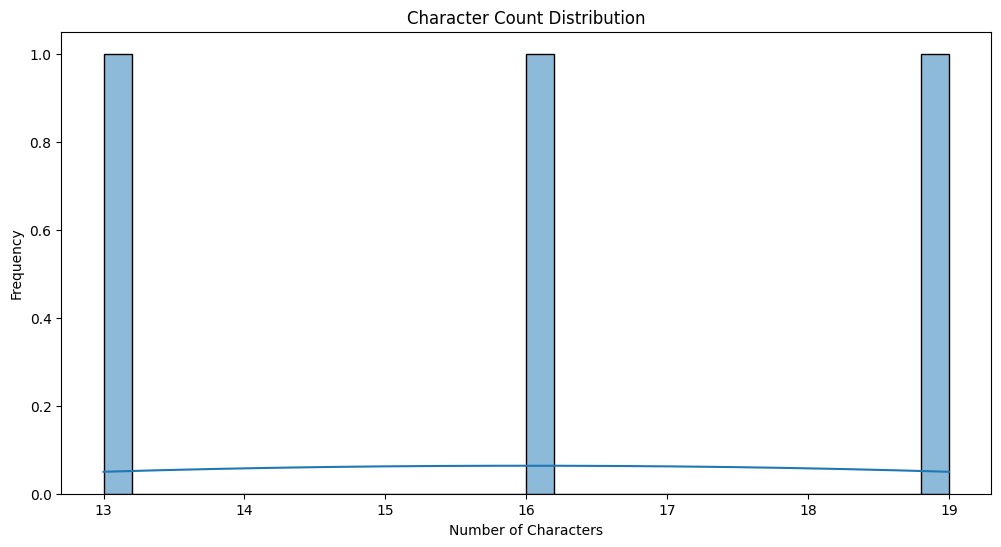

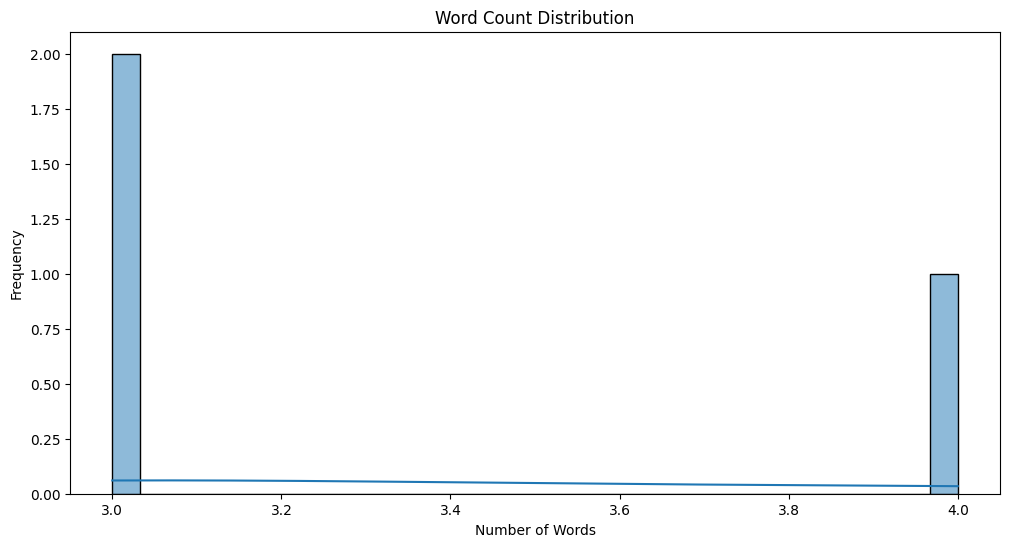

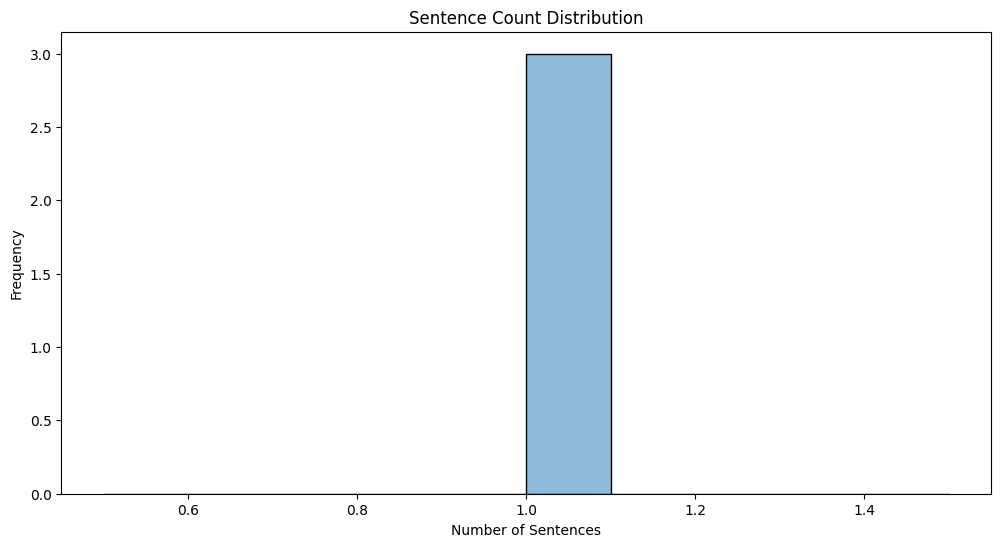

<ipython-input-47-60fbd939534e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(char_distribution.keys()), y=list(char_distribution.values()), palette='viridis')


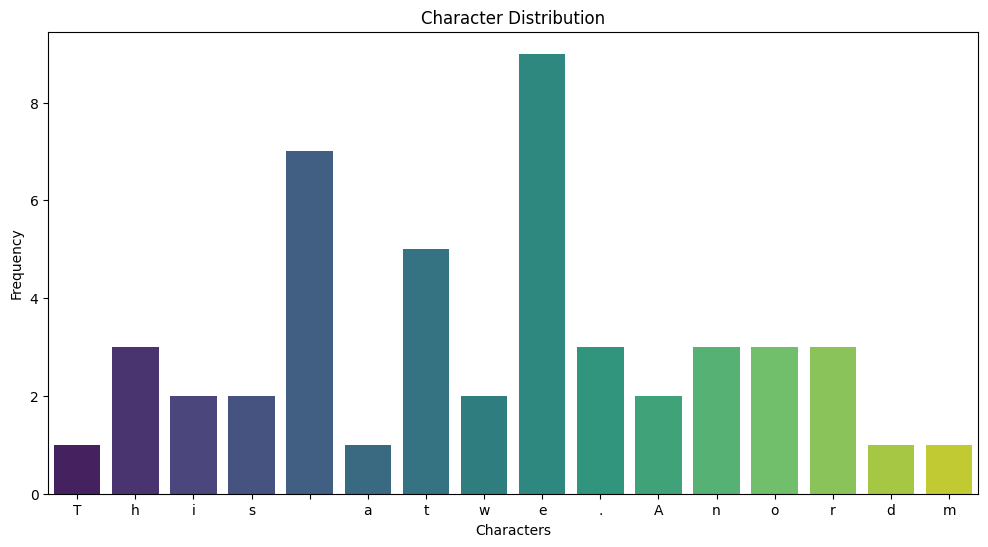

<ipython-input-47-60fbd939534e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


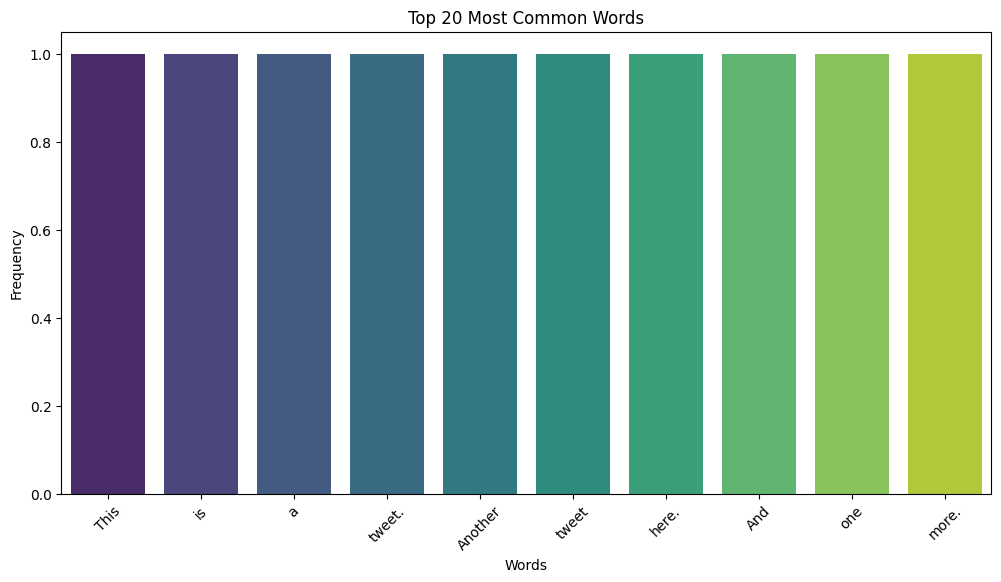

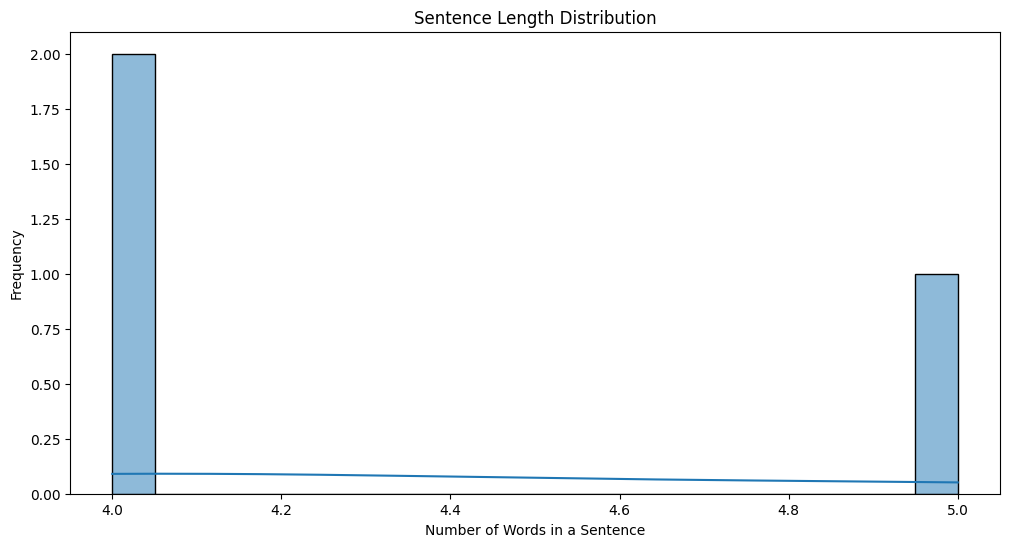

In [ ]:
# Plot character count distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['char_count'], bins=30, kde=True)
plt.title('Character Count Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Plot word count distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Plot sentence count distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['sentence_count'], bins=10, kde=True)
plt.title('Sentence Count Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

# Plot character distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(char_distribution.keys()), y=list(char_distribution.values()), palette='viridis')
plt.title('Character Distribution')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

# Plot word distribution (top 20 most common words)
most_common_words = word_distribution.most_common(20)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot sentence length distribution
plt.figure(figsize=(12, 6))
sns.histplot(sentence_lengths, bins=20, kde=True)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Words in a Sentence')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Most important features (words)
feature_names = vectorizer.get_feature_names_out()
coefs = clf.coef_[0]
top_positive_indices = np.argsort(coefs)[-10:]
top_negative_indices = np.argsort(coefs)[:10]

plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
# Most important features (words)
feature_names = vectorizer.get_feature_names_out()
coefs = clf.coef_[0]
top_positive_indices = np.argsort(coefs)[-10:]
top_negative_indices = np.argsort(coefs)[:10]

plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

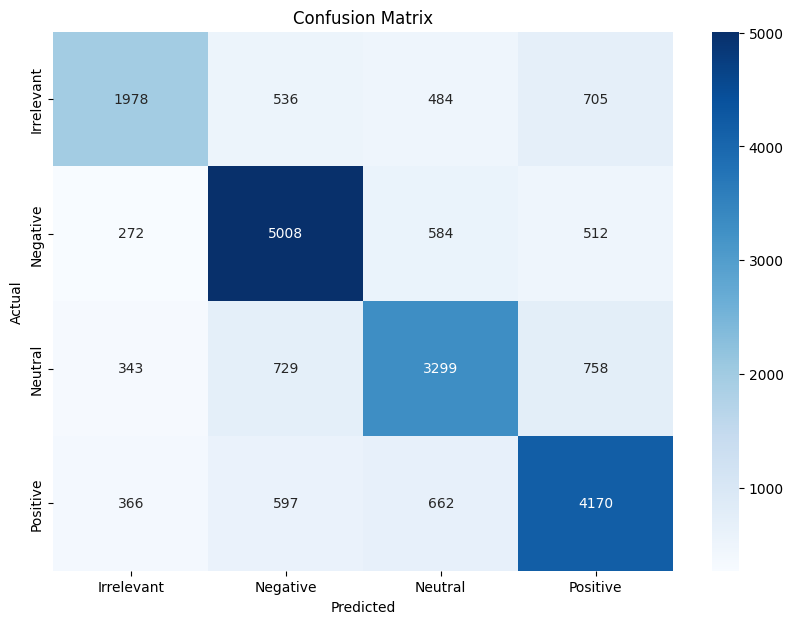

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Top Positive Words')

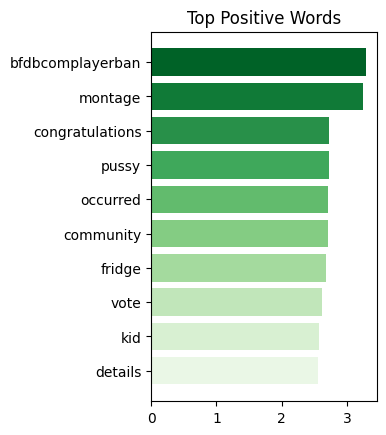

In [ ]:
# Shades of blue for positive words
plt.subplot(1, 2, 1)
colors_pos = sns.color_palette("Greens", len(top_positive_indices))
plt.barh([feature_names[i] for i in top_positive_indices], coefs[top_positive_indices], color=colors_pos)
plt.title('Top Positive Words')

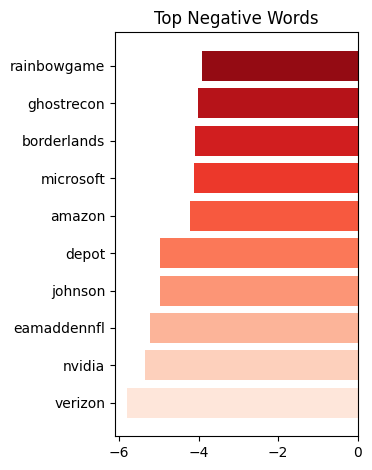

In [ ]:
# Shades of red for negative words
plt.subplot(1, 2, 2)
colors_neg = sns.color_palette("Reds", len(top_negative_indices))
plt.barh([feature_names[i] for i in top_negative_indices], coefs[top_negative_indices], color=colors_neg)
plt.title('Top Negative Words')

plt.tight_layout()
plt.show()